In [ ]:
#conda install -c conda-forge imbalanced-learn

In [1]:
#conda install -c conda-forge xgboost

In [1]:
import sklearn as sklearn
import pandas as pd
import numpy as np
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading csv file as pandas dataframe
input_data=pd.read_csv('coding_round_data.csv')
cat_col=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
num_col=input_data.columns[0:10]
input_data[['Weekend','Revenue']]=input_data[['Weekend','Revenue']].astype('int64')
input_data[cat_col]=input_data[cat_col].astype("category")
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer([("power_trans", PowerTransformer(), slice(0,9)),("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False), slice(10,16))],remainder='passthrough')
#ct = ColumnTransformer([("MinMaxScaler", MinMaxScaler(), slice(0,10)),("ohe", OneHotEncoder(handle_unknown='ignore', sparse=False), slice(10,16))],remainder='passthrough')
ct.fit_transform(input_data)
input_ready_2=pd.DataFrame(ct.fit_transform(input_data))


In [10]:
input_ready_2.columns=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'SpecialDay', 'Weekend', 'Revenue']

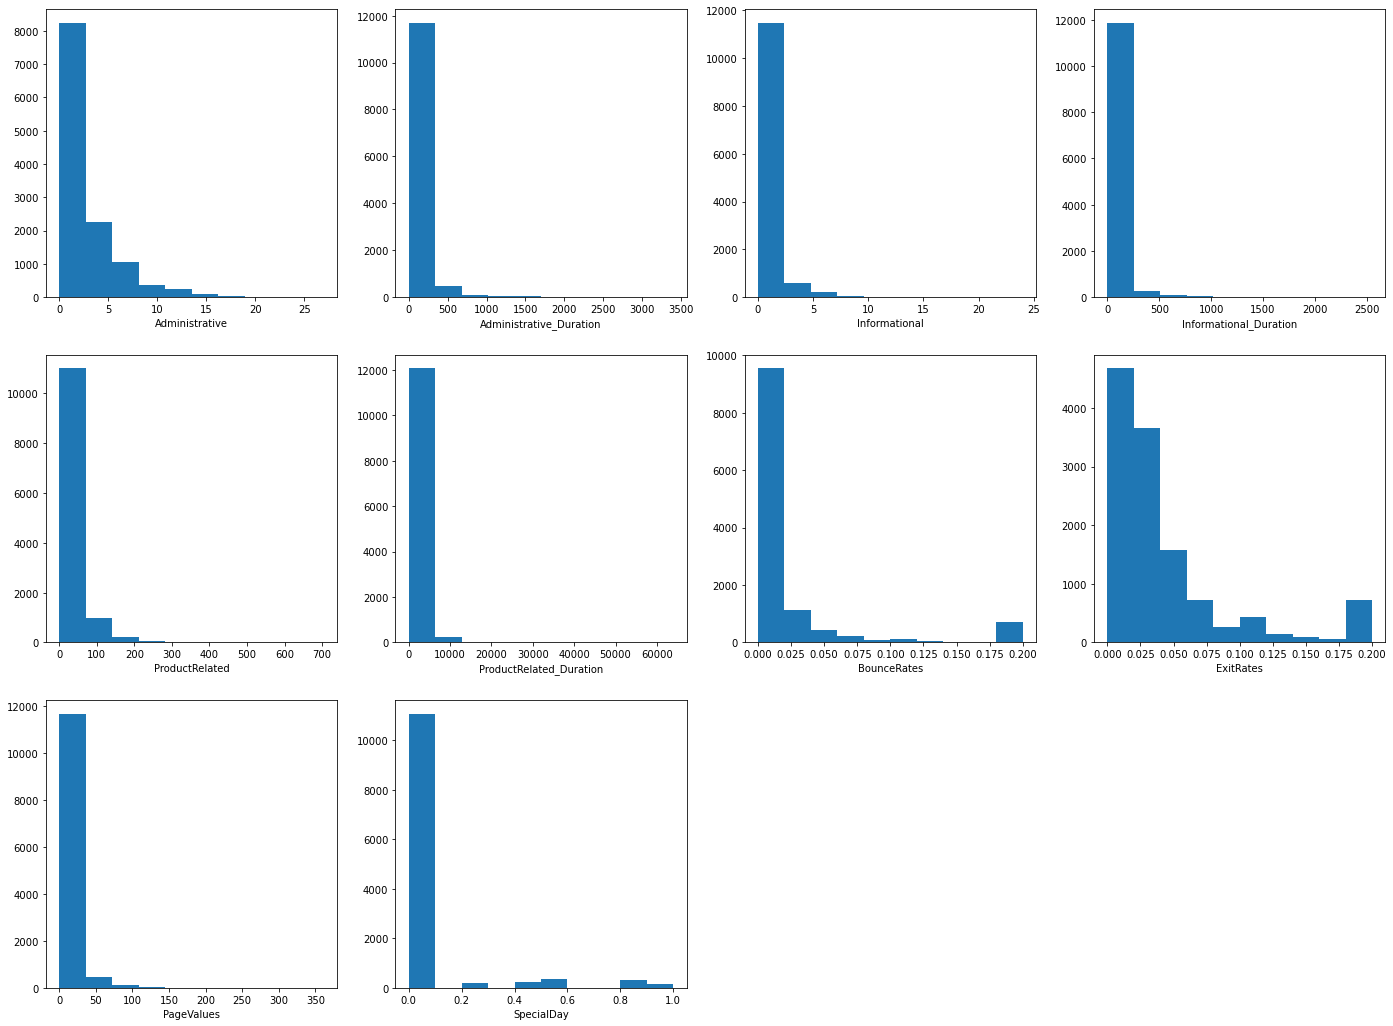

In [11]:
plt.figure(figsize=(24,18))
for i in range(0,10):
    plt.subplot(3,4,i+1)
    plt.hist(input_data.iloc[:,i])
    plt.xlabel(input_data.columns[i])

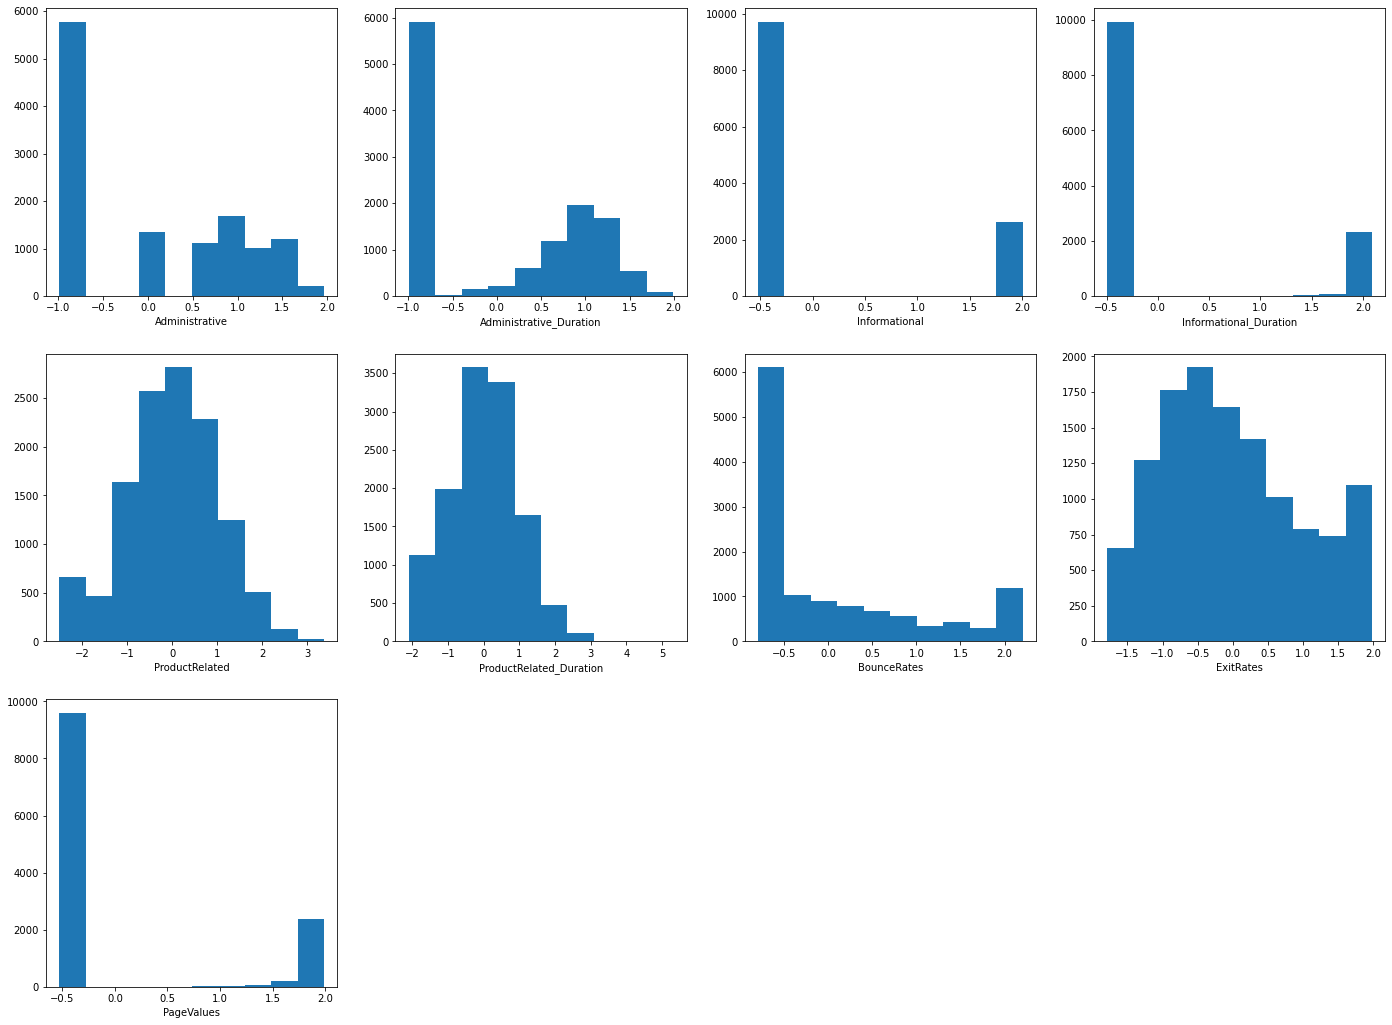

In [13]:
plt.figure(figsize=(24,18))
for i in range(0,9):
    plt.subplot(3,4,i+1)
    plt.hist(input_ready_2.iloc[:,i])
    plt.xlabel(input_ready_2.columns[i])

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(input_ready_2.iloc[:,0:74],input_ready_2.iloc[:,74:75],test_size=1/5, random_state=42)
x_train.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

print('no.  of train instances: ',len(x_train.index))
print('no.  of test instances: ',len(x_test.index))

no.  of train instances:  9864
no.  of test instances:  2466


In [71]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

sm_strategy=0.5
rus = RandomUnderSampler(random_state=0)# fit predictor and target variable
ros = RandomOverSampler(random_state=0)
comb_over=RandomOverSampler(random_state=0,sampling_strategy=sm_strategy)
comb_under=RandomUnderSampler(random_state=42)
smote=SMOTE(sampling_strategy='minority')
tome=TomekLinks(sampling_strategy='majority')

x_rus, y_rus = rus.fit_resample(x_train, y_train)
x_ros, y_ros = ros.fit_resample(x_train, y_train)
x_comb, y_comb = comb_over.fit_resample(x_train, y_train)
x_comb, y_comb = comb_under.fit_resample(x_comb, y_comb)
x_tome, y_tome = tome.fit_resample(x_train, y_train)
x_tome, y_tome = ros.fit_resample(x_tome, y_tome)
x_smote, y_smote = smote.fit_resample(x_train, y_train)
x_smote, y_smote = ros.fit_resample(x_smote, y_smote)

(array([8367.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8367.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

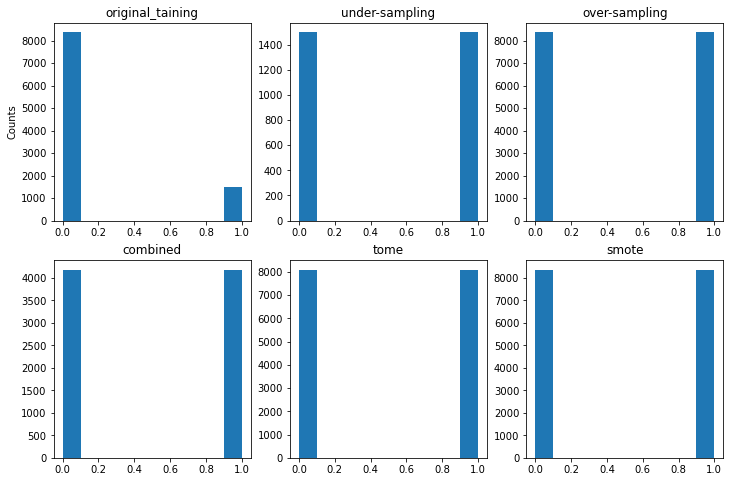

In [72]:
plt.figure(figsize=(12,8))
plt.subplot(2, 3, 1)
plt.title('original_taining')
plt.hist(y_train)
plt.ylabel('Counts')
plt.subplot(2, 3, 2)
plt.title('under-sampling')
plt.hist(y_rus)
plt.subplot(2, 3, 3)
plt.title('over-sampling')
plt.hist(y_ros)
plt.subplot(2, 3, 4)
plt.title('combined')
plt.hist(y_comb)
plt.subplot(2, 3, 5)
plt.title('tome')
plt.hist(y_tome)
plt.subplot(2, 3, 6)
plt.title('smote')
plt.hist(y_smote)

              precision    recall  f1-score   support

     class 0       0.96      0.88      0.92      2055
     class 1       0.58      0.80      0.67       411

    accuracy                           0.87      2466
   macro avg       0.77      0.84      0.79      2466
weighted avg       0.89      0.87      0.88      2466



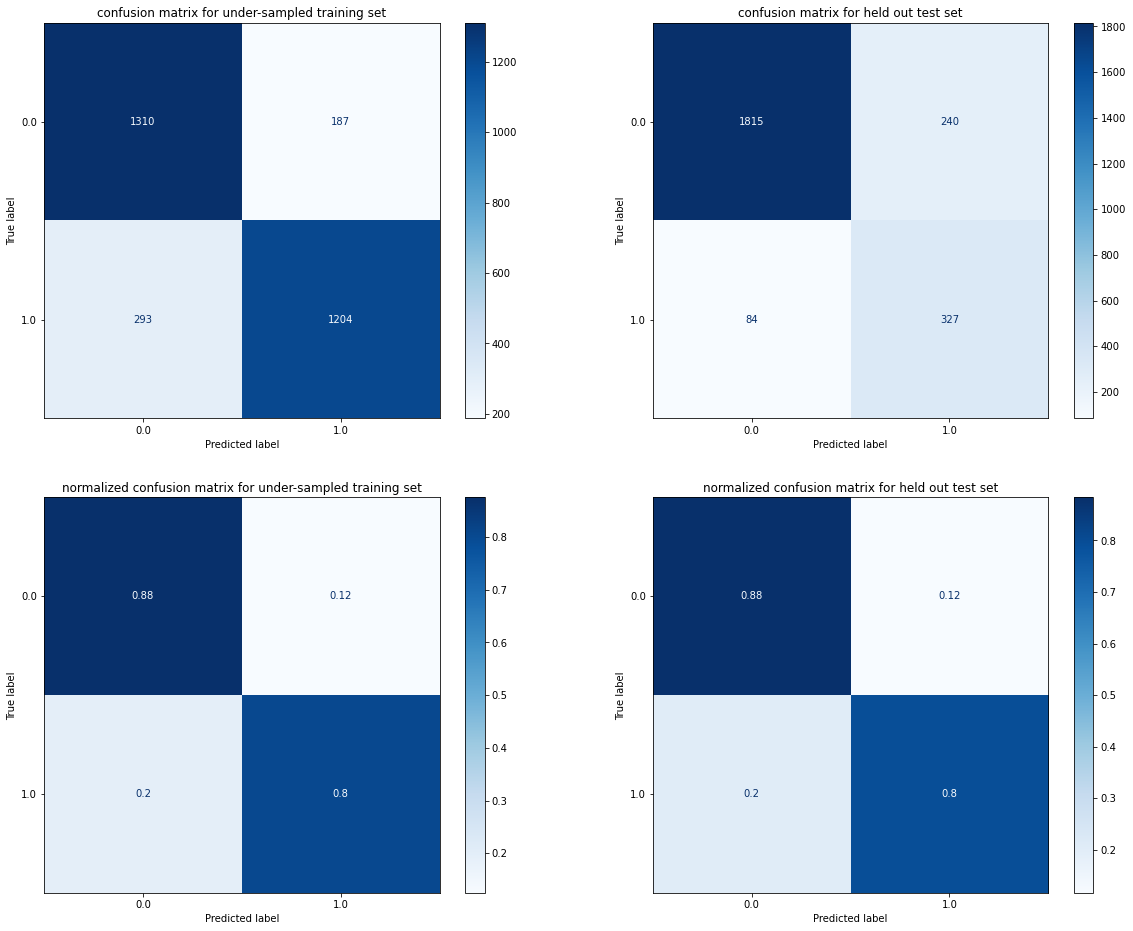

In [95]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report


linsvc_cl = BalancedBaggingClassifier(LinearSVC(tol=1e-6,C=.01,max_iter=1000),sampling_strategy='not minority')
cv=cross_validate(linsvc_cl, x_train, y_train.values.ravel(), cv=5,scoring='balanced_accuracy',return_estimator='true')
#parameters = {'tol':[1e-3,1e-4,1e-5,1e-6],'C': [0.01,0.1,1,10],'max_iter':[1000],'n_jobs':[6]}
#clf = RandomizedSearchCV(linsvc_cl, parameters,n_iter=1000,cv=5,scoring='balanced_accuracy',random_state=42)
#search = linsvc_cl.fit(x_train, y_train)

print(classification_report(y_test, cv['estimator'][0].predict(x_test),target_names = ['class 0', 'class 1']))



plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)

              precision    recall  f1-score   support

     class 0       0.91      0.95      0.93      2055
     class 1       0.67      0.53      0.59       411

    accuracy                           0.88      2466
   macro avg       0.79      0.74      0.76      2466
weighted avg       0.87      0.88      0.87      2466



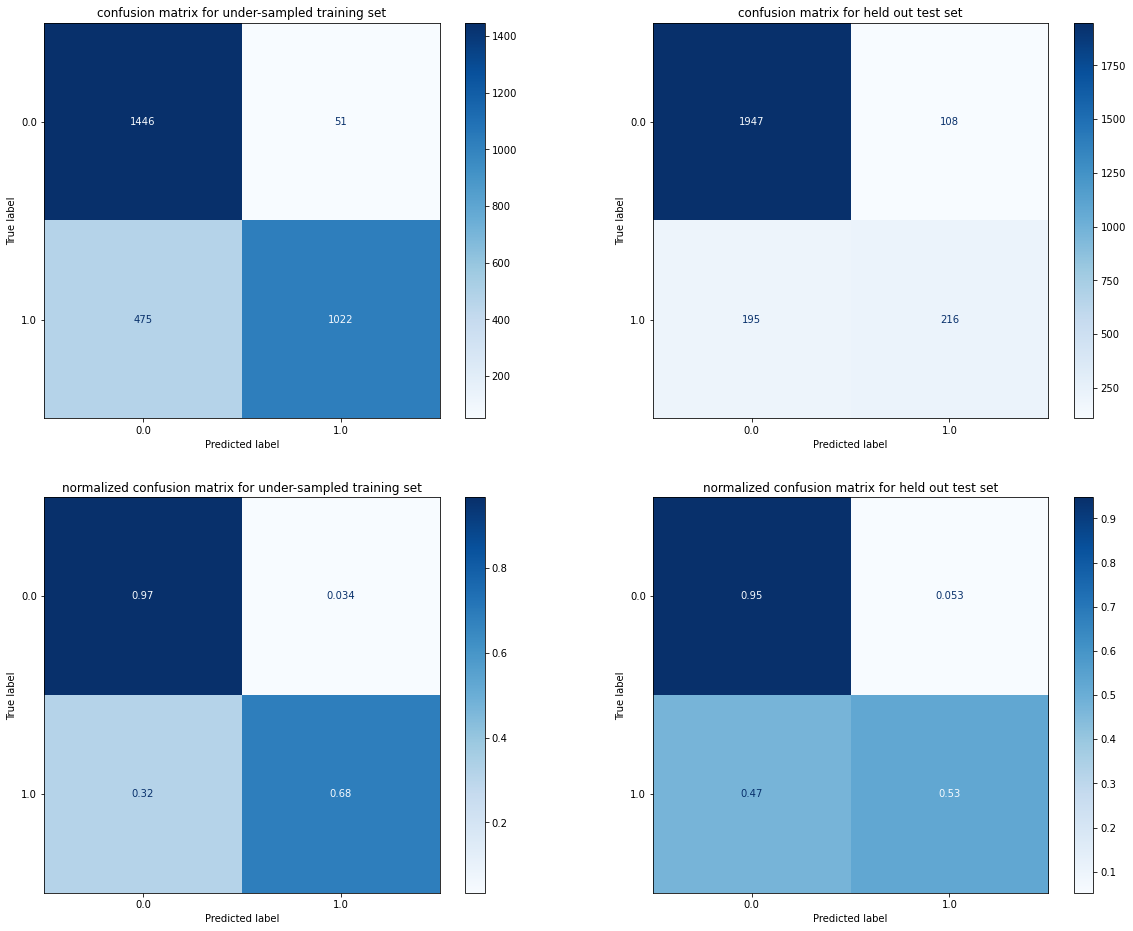

In [94]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report


kn_cl = BalancedBaggingClassifier(KNeighborsClassifier(n_neighbors=3),sampling_strategy='not majority')
cv=cross_validate(kn_cl, x_train, y_train.values.ravel(), cv=5,scoring='balanced_accuracy',return_estimator='true')
#parameters = {'tol':[1e-3,1e-4,1e-5,1e-6],'C': [0.01,0.1,1,10],'max_iter':[1000],'n_jobs':[6]}
#clf = RandomizedSearchCV(linsvc_cl, parameters,n_iter=1000,cv=5,scoring='balanced_accuracy',random_state=42)
#search = linsvc_cl.fit(x_train, y_train)

print(classification_report(y_test, cv['estimator'][0].predict(x_test),target_names = ['class 0', 'class 1']))



plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


              precision    recall  f1-score   support

     class 0       0.96      0.89      0.92      2055
     class 1       0.58      0.80      0.67       411

    accuracy                           0.87      2466
   macro avg       0.77      0.84      0.80      2466
weighted avg       0.89      0.87      0.88      2466



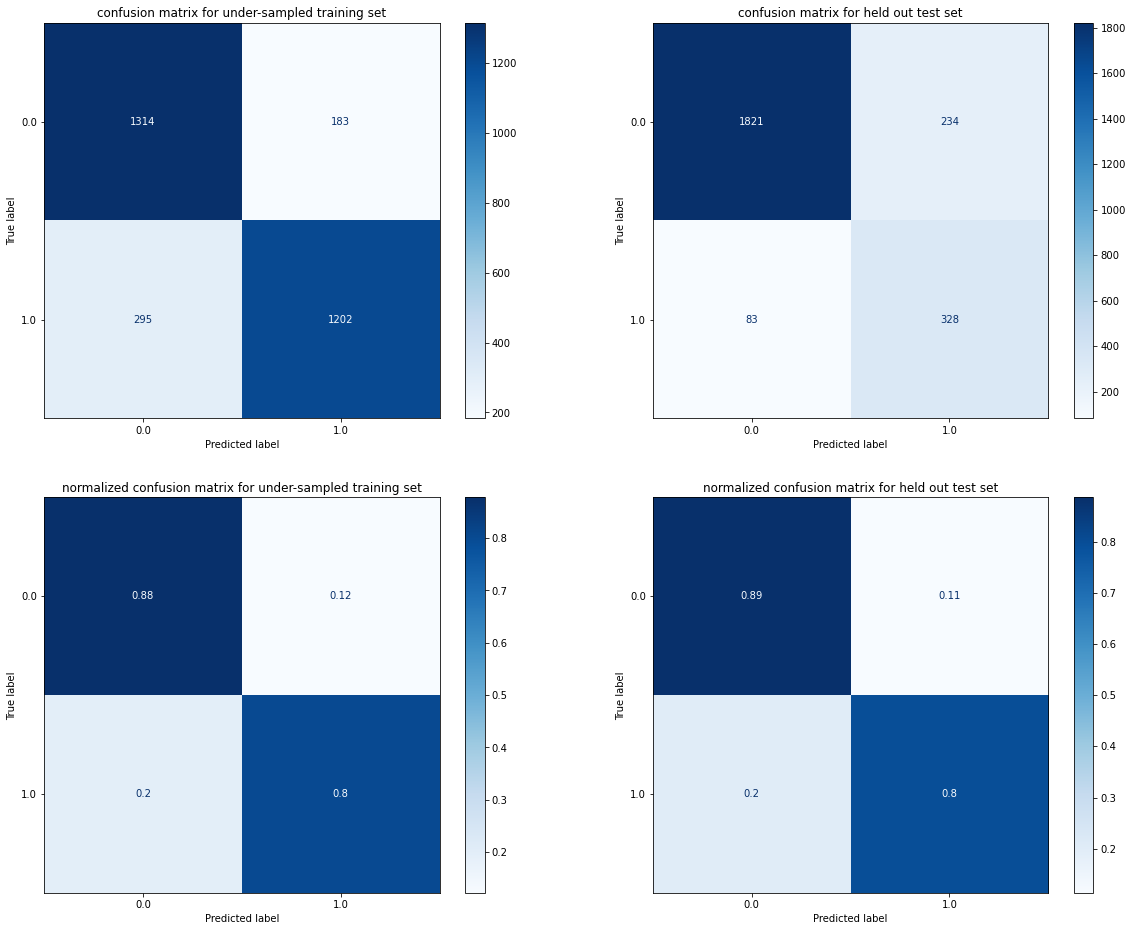

In [106]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report


svc_cl = BalancedBaggingClassifier(SVC(gamma='auto',C=.1,kernel='rbf'),sampling_strategy='not minority')
cv=cross_validate(svc_cl, x_train, y_train.values.ravel(), cv=5,scoring='balanced_accuracy',return_estimator='true')
#parameters = {'tol':[1e-3,1e-4,1e-5,1e-6],'C': [0.01,0.1,1,10],'max_iter':[1000],'n_jobs':[6]}
#clf = RandomizedSearchCV(linsvc_cl, parameters,n_iter=1000,cv=5,scoring='balanced_accuracy',random_state=42)
#search = linsvc_cl.fit(x_train, y_train)

print(classification_report(y_test, cv['estimator'][0].predict(x_test),target_names = ['class 0', 'class 1']))



plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)

              precision    recall  f1-score   support

     class 0       0.96      0.87      0.92      2055
     class 1       0.57      0.83      0.68       411

    accuracy                           0.87      2466
   macro avg       0.77      0.85      0.80      2466
weighted avg       0.90      0.87      0.88      2466



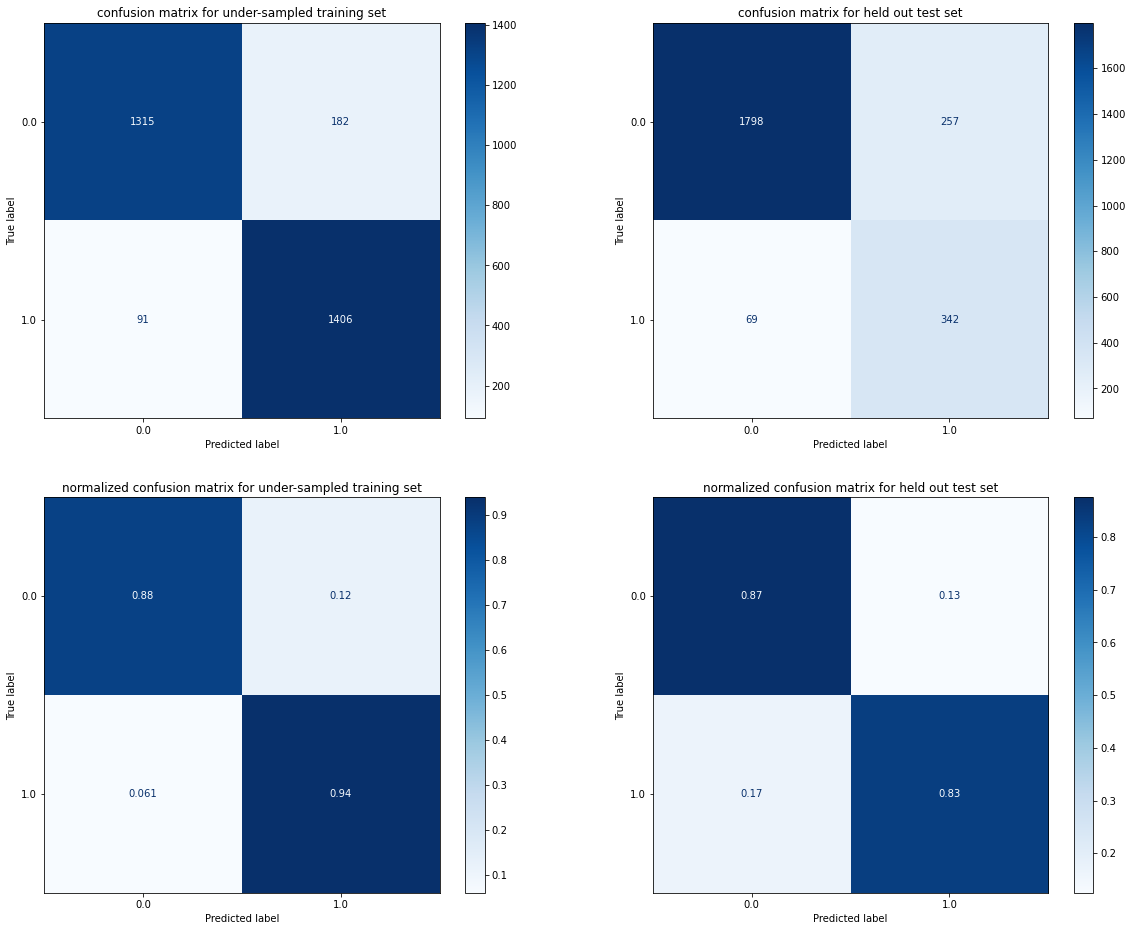

In [107]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report


gbrt_cl = BalancedBaggingClassifier(GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=5, random_state=0),sampling_strategy='not minority')
cv=cross_validate(gbrt_cl, x_train, y_train.values.ravel(), cv=5,scoring='balanced_accuracy',return_estimator='true')
#parameters = {'tol':[1e-3,1e-4,1e-5,1e-6],'C': [0.01,0.1,1,10],'max_iter':[1000],'n_jobs':[6]}
#clf = RandomizedSearchCV(linsvc_cl, parameters,n_iter=1000,cv=5,scoring='balanced_accuracy',random_state=42)
#search = linsvc_cl.fit(x_train, y_train)

print(classification_report(y_test, cv['estimator'][0].predict(x_test),target_names = ['class 0', 'class 1']))



plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(cv['estimator'][0],x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)

              precision    recall  f1-score   support

     class 0       0.97      0.85      0.91      2055
     class 1       0.54      0.85      0.66       411

    accuracy                           0.85      2466
   macro avg       0.75      0.85      0.78      2466
weighted avg       0.90      0.85      0.86      2466



BalancedRandomForestClassifier(bootstrap=False, max_depth=50,
                               min_samples_leaf=0.0001, min_samples_split=10,
                               n_estimators=200, n_jobs=6,
                               sampling_strategy='not minority')

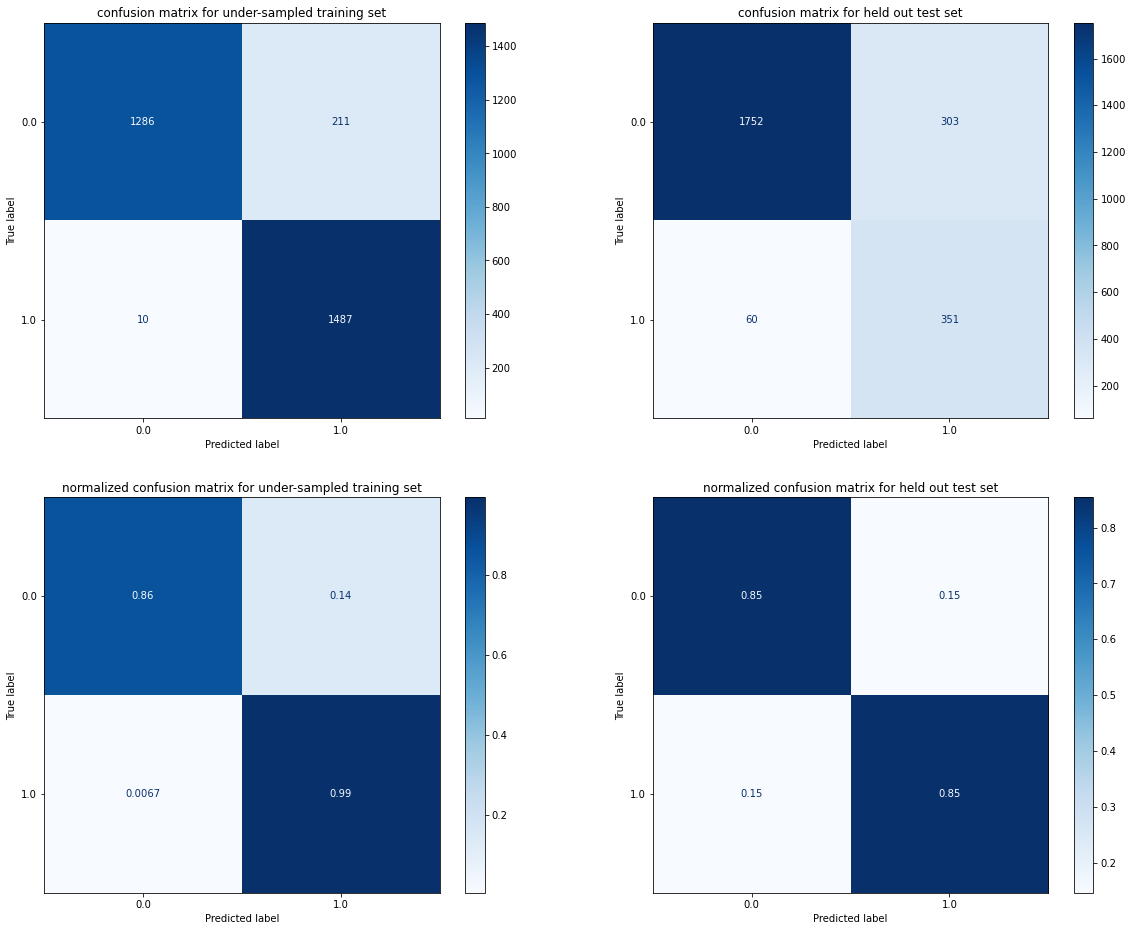

In [109]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
rfcl = BalancedRandomForestClassifier()
from sklearn.metrics import classification_report

parameters = {'n_estimators':[10,50,100,200],'bootstrap': [True, False],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[4,12,16,20,30,50],'sampling_strategy':['not minority'],'min_samples_split':[2,10,40,80],'min_samples_leaf':[0.0001,0.001,0.01] ,'n_jobs':[6]}
clf = RandomizedSearchCV(rfcl, parameters,n_iter=1000,cv=5,scoring='balanced_accuracy',random_state=42)
search = clf.fit(x_train, y_train.values.ravel())
print(classification_report(y_test, search.best_estimator_.predict(x_test),target_names = ['class 0', 'class 1']))

plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search.best_estimator_,x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


search.best_estimator_

In [110]:
search.best_estimator_.min_samples_leaf


0.0001

              precision    recall  f1-score   support

     class 0       0.97      0.85      0.91      2055
     class 1       0.54      0.85      0.66       411

    accuracy                           0.85      2466
   macro avg       0.75      0.85      0.78      2466
weighted avg       0.90      0.85      0.87      2466



BalancedRandomForestClassifier(bootstrap=False, max_depth=20,
                               min_samples_leaf=5e-05, min_samples_split=8,
                               n_estimators=240, n_jobs=4,
                               sampling_strategy='not minority')

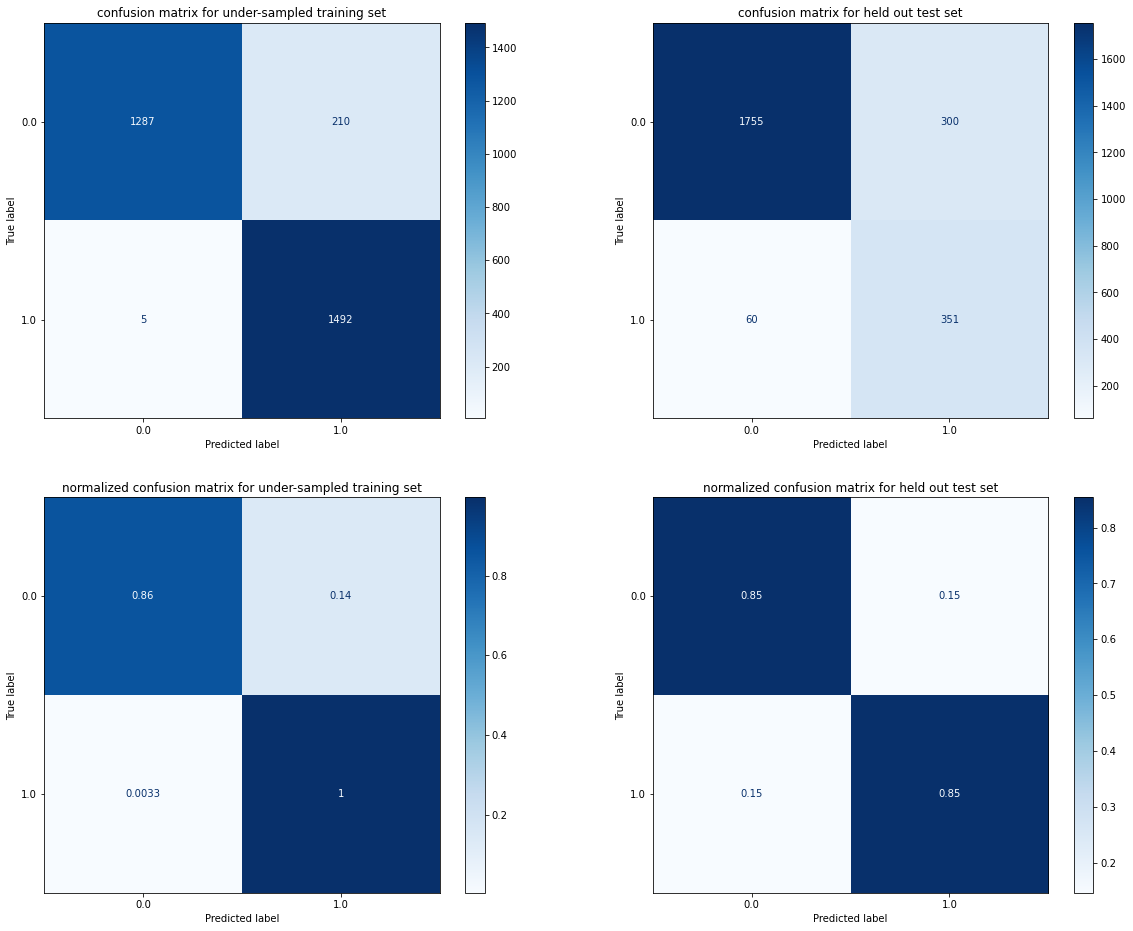

In [111]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
rfcl = BalancedRandomForestClassifier()
parameters = {'n_estimators':[160,180,200,220,240],'bootstrap': [False],'max_features':['auto'],'max_depth':[15,20,25],'sampling_strategy':['not minority'],'min_samples_split':[2,4,6,8],'min_samples_leaf':[0.0005,0.0001,0.00005] ,'n_jobs':[4]}
clf = GridSearchCV(rfcl, parameters,cv=5,scoring='balanced_accuracy')
search_gr = clf.fit(x_train, y_train.values.ravel())

print(classification_report(y_test, search_gr.best_estimator_.predict(x_test),target_names = ['class 0', 'class 1']))

plt.figure(figsize=[20,16])
ax1=plt.subplot(2,2,1)
plt.title('confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_rus,y_rus,normalize=None,ax=ax1,cmap=plt.cm.Blues)
ax2=plt.subplot(2,2,2)
plt.title('confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_test,y_test,normalize=None,ax=ax2,cmap=plt.cm.Blues)
ax3=plt.subplot(2,2,3)
plt.title('normalized confusion matrix for under-sampled training set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_rus,y_rus,normalize='true',ax=ax3,cmap=plt.cm.Blues)
ax4=plt.subplot(2,2,4)
plt.title('normalized confusion matrix for held out test set')
ConfusionMatrixDisplay.from_estimator(search_gr.best_estimator_,x_test,y_test,normalize='true',ax=ax4,cmap=plt.cm.Blues)


search_gr.best_estimator_